In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Preprocessing : Normalize the pixel values to be between 0 and 1

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Reshape the images to (28, 28, 1) as they are grayscale

In [6]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

## Convert the labels to one-hot encoded format

In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Build the CNN model

In [8]:
model =  models.Sequential()

## First convolutional layer

In [10]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Second convolutional layer

In [11]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

## Third convolutional layer

In [12]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

## Flatten the 3D output to 1D and add Dense layer

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

## Output layer with 10 neurons (for 10 digit classes)

In [15]:
model.add(layers.Dense(10, activation='softmax'))

## Compile the model

In [21]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Train the model

In [22]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 123s 128ms/step - accuracy: 0.8792 - loss: 0.3963 - val_accuracy: 0.9833 - val_loss: 0.0472
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 121s 129ms/step - accuracy: 0.9848 - loss: 0.0476 - val_accuracy: 0.9877 - val_loss: 0.0389
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 127s 135ms/step - accuracy: 0.9893 - loss: 0.0339 - val_accuracy: 0.9922 - val_loss: 0.0266
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 128s 137ms/step - accuracy: 0.9930 - loss: 0.0230 - val_accuracy: 0.9908 - val_loss: 0.0296
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 146s 142ms/step - accuracy: 0.9937 - loss: 0.0198 - val_accuracy: 0.9917 - val_loss: 0.0251


## Evaluate the model on test data

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9897 - loss: 0.0304
Test accuracy: 99.17%


## Make predictions on test images

In [30]:
predictions = model.predict(test_images)
print(f"Prediction for first test image: {np.argmax(predictions[5])}")
print(f"Actual test label for first test image: {test_labels[0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
Prediction for first test image: 1
Actual test label for first test image: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


<function matplotlib.pyplot.show(close=None, block=None)>

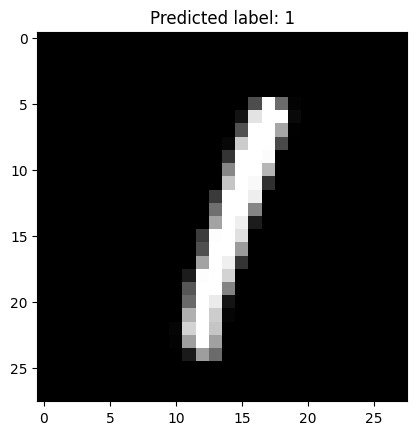

In [31]:
plt.imshow(test_images[5].reshape(28, 28), cmap='gray')
plt.title(f"Predicted label: {predictions[5].argmax()}")
plt.show